# Neural Network

*With PyTorch*

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# custom file
from dataset import FaceEmotionsDataset
from transform import Rescale, RandomCrop, ToTensor

### Load the data

To load the dataset I use a custom dataset class and custom transforms process our dataset.

In [2]:
data_transform = transforms.Compose([
    Rescale(68),
    RandomCrop(64),
    ToTensor()
])

transformed_dataset = FaceEmotionsDataset(csv_file='csv/cleaned_data.csv',
                                          root_dir='img/',
                                          transform=data_transform)

dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)

0 torch.Size([4, 64, 64]) ['surprise', 'neutral', 'happiness', 'happiness']


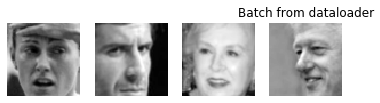

1 torch.Size([4, 64, 64]) ['anger', 'happiness', 'happiness', 'happiness']


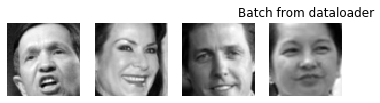

2 torch.Size([4, 64, 64]) ['happiness', 'happiness', 'happiness', 'happiness']


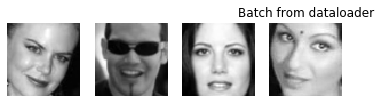

3 torch.Size([4, 64, 64]) ['neutral', 'happiness', 'neutral', 'happiness']


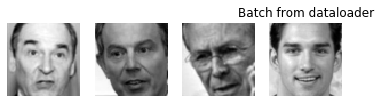

In [3]:
for i_batch, sample_batched in enumerate(dataloader):
    images_batch, emotions_batch = sample_batched['image'], sample_batched['emotion']
    print(i_batch, images_batch.size(),emotions_batch)

    # observe 4th batch and stop.
    plt.figure()
    batch_size = len(images_batch)
    for i in range(batch_size):
        plt.subplot(1, 4, i+1)
        plt.imshow(images_batch[i], cmap='gray')
        plt.axis('off')

    plt.title('Batch from dataloader')
    plt.show()
    if i_batch == 3:
        break
        